In [18]:
path = '/Users/shalu/Documents/CMPE256/epinion_project/256_group_project/Dataset/epinion_network_trustedby.csv'
import pandas as pd
df = pd.read_csv(path)

In [19]:
df.head()

,Unnamed: 0,item,paid,review,stars,time,user,user1,trustedby,user2
0,4,pr-Durabrand_CD-85_Personal_CD_Player,20,just recently my sony dej001 walkman died on m...,4,1149292800,spongebag7,spongebag7,trustedby,rcaarmsc07
1,5,pr-Durabrand_CD-85_Personal_CD_Player,20,just recently my sony dej001 walkman died on m...,4,1149292800,spongebag7,spongebag7,trustedby,blindsider
2,6,pr-Durabrand_CD-85_Personal_CD_Player,20,just recently my sony dej001 walkman died on m...,4,1149292800,spongebag7,spongebag7,trustedby,bruguru
3,7,pr-Durabrand_CD-85_Personal_CD_Player,20,just recently my sony dej001 walkman died on m...,4,1149292800,spongebag7,spongebag7,trustedby,speeddemon531
4,8,pr-Durabrand_CD-85_Personal_CD_Player,20,just recently my sony dej001 walkman died on m...,4,1149292800,spongebag7,spongebag7,trustedby,cyndia


In [20]:
df.nunique()

Unnamed: 0    1823678
item            25911
paid             4672
review          54287
stars               5
time             4544
user            17607
user1           35988
trustedby           1
user2           36876
dtype: int64

In [21]:
import networkx as nw

In [22]:
G = nw.from_pandas_edgelist(df, 'user1', 'user2')

In [23]:
for index, row in df.iterrows():
    G.add_edge(row['user1'], row['user2'])

In [24]:
pos = nw.spring_layout(G)

In [28]:
import matplotlib
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
# Figure Dimensions
value_height=9
value_width=16
matplotlib.rcParams['figure.figsize']=[12, 8]

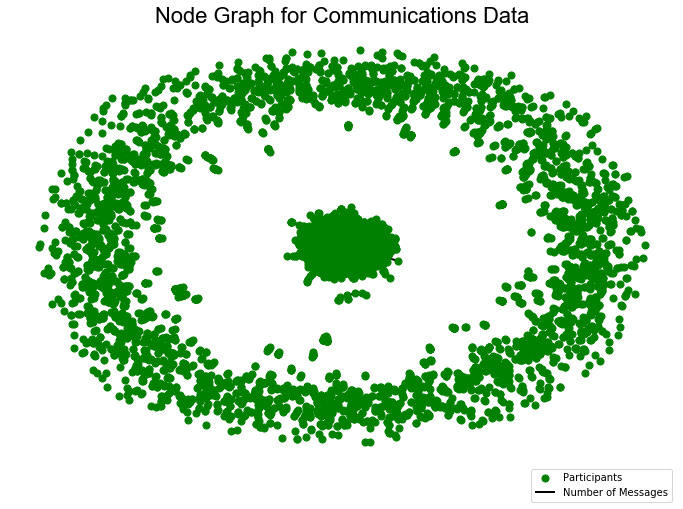

In [29]:
# Drawing the graph
nw.draw_networkx_nodes(G, pos, with_labels=True, node_size=50,font_size=7,node_color='green', label='Participants')
nw.draw_networkx_edges(G, pos, with_labels=False, width=2.0,label='Number of Messages')
plt.title('Node Graph for Communications Data', fontsize=22, fontname='Arial')
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(1, 0), loc='best', ncol=1)
plt.savefig('base.png', dpi=400)

In [30]:
# Calculating Centrality metrics for the Graph

dict_degree_centrality = nw.degree_centrality(G)
dict_closeness_centrality = nw.closeness_centrality(G)
dict_eigenvector_centrality = nw.eigenvector_centrality(G)

KeyboardInterrupt: 

In [32]:
from collections import Counter
# Top 10 nodes with the largest values of degree centrality in descending order
dict(Counter(dict_degree_centrality).most_common(10))

{'ptiemann': 0.06384101964629134,
 'nancy35c': 0.03203363626079415,
 'gooberpyle': 0.03077039104038614,
 'mszorak': 0.030336739696066973,
 'charles': 0.027112636223085337,
 'bonniesayers': 0.026848674535238887,
 'poseidon': 0.02594366303405106,
 'jo.com': 0.025773973377578342,
 'surferdude7': 0.02562313812738037,
 'kristinafh': 0.02541573965835816}

In [ ]:
# Top 10 nodes with the largest values of degree centrality in descending order
dict(Counter(dict_degree_centrality).most_common(10))

# Top 10 nodes with the largest values of closeness centrality in descending order
dict(Counter(dict_closeness_centrality).most_common(10))

# Top 10 nodes with the largest values of eigenvector centrality in descending order
dict(Counter(dict_eigenvector_centrality).most_common(10))

# Function to plot the graphs for each centrality metric
matplotlib.rcParams['figure.figsize']= [24, 8]
def draw(G, pos, lista, listb, measure_name):
    nodes=nw.draw_networkx_nodes(G, pos, node_size=100, cmap=plt.cm.viridis,node_color=lista,nodelist=listb)
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    edges=nw.draw_networkx_edges(G, pos)
    plt.title(measure_name, fontsize=22, fontname='Arial')
    plt.colorbar(nodes)
    plt.axis('off')

plt.subplot(1,3,1)
list_pos_values = []
for i in nw.degree_centrality(G).values():
    list_pos_values.append(i)
    list_pos_keys=[]
for i in nw.degree_centrality(G).keys():
    list_pos_keys.append(i)
draw(G, pos, list_pos_values, list_pos_keys, 'Degree Centrality')

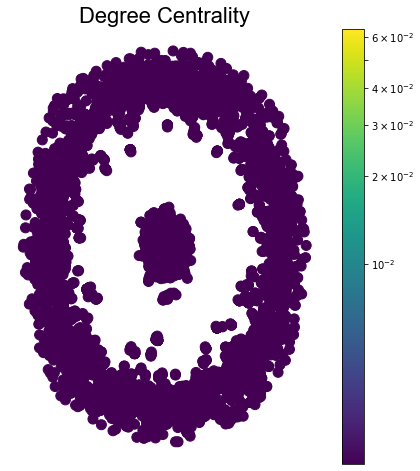

In [33]:
matplotlib.rcParams['figure.figsize']= [24, 8]
def draw(G, pos, lista, listb, measure_name):
    nodes=nw.draw_networkx_nodes(G, pos, node_size=100, cmap=plt.cm.viridis,node_color=lista,nodelist=listb)
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    edges=nw.draw_networkx_edges(G, pos)
    plt.title(measure_name, fontsize=22, fontname='Arial')
    plt.colorbar(nodes)
    plt.axis('off')

plt.subplot(1,3,1)
list_pos_values = []
for i in nw.degree_centrality(G).values():
    list_pos_values.append(i)
    list_pos_keys=[]
for i in nw.degree_centrality(G).keys():
    list_pos_keys.append(i)
draw(G, pos, list_pos_values, list_pos_keys, 'Degree Centrality')

In [ ]:
# Reference: https://medium.com/@adityagandhi.7/network-analysis-and-community-structure-for-market-surveillance-using-python-networkx-65413e7b7fee
